# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [45]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [46]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()

****
## Preliminary Analysis

In [47]:
# deal with missing and inconvenient portions of data 
#print(clean_hospital_read_df.info())
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
#print(clean_hospital_read_df.info())

/home/jonas/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


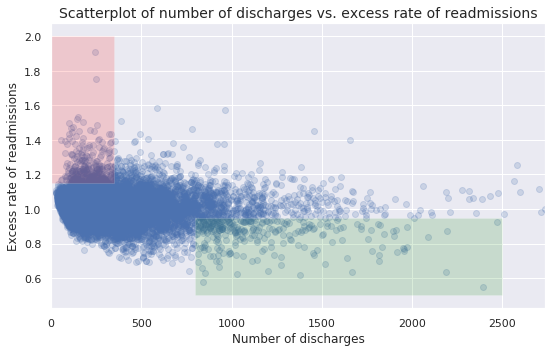

In [48]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

****
# Solutions by Jonas Cuadrado

## A. Analysis

Positive aspects: 
 + Data is cleaned before performing operations

Negative aspects: 
 + There is no formal hypothesis, and no hypothesis testing. 
 + Lack of significance of the data
 + Plot very poor, it is hard to read
 + Lack of analysis of other parameters
 + Conclusions cannot be immediately withdrawn from the data


## B. Alternative analysis

We want to analyze the origin of Excess Readmition Ratios in some hospitals. We wil build on the existing report, and extend its scope. First, we want to make sure that the overall trend reported is correct, that is, contrast the hypothesis:

* **H0**: The Excess Readmission Ratio (XRR) does not depend on the number of discharges.
* **H1**: Centers with larger number of discharges have a smaller Excess Readmission Ratio (XRR).

We will look at the Pearson correlation statistic, by means of bootstrapping.

Observed Pearson r = -0.09309554287590441
p-val = 0.0


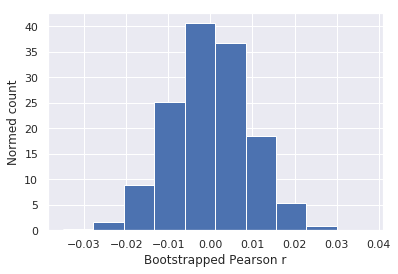

In [49]:
import scipy.stats
import seaborn as sns
sns.set()

xs =clean_hospital_read_df['Number of Discharges'][81:-3].values
ys = clean_hospital_read_df['Excess Readmission Ratio'][81:-3].values
r_obs = scipy.stats.pearsonr(xs,ys)[0]
print('Observed Pearson r =', r_obs)

nperm=25000
perm_replicates = np.empty(nperm)

for i in range(nperm):
    y_permuted = np.random.permutation(ys)
    perm_replicates[i] = scipy.stats.pearsonr(xs,y_permuted)[0]

# significance
p = np.sum(perm_replicates<r_obs)/len(perm_replicates)
print('p-val =', p)


# plot bootstrapped r's
plt.hist(perm_replicates, normed=True)
plt.xlabel('Bootstrapped Pearson r')
plt.ylabel('Normed count')
plt.show()

There is statistical significance for $\alpha$ = 0.01. The null hypothesis is rejected, it is true that XRR depends on the number of discharges, with negative correlation. 
Now, statistical significance is not yet clear the practical implications, as there may be other parameters affecting the trend.
To clear it out, let's look at the total numbers instead of the ratios:

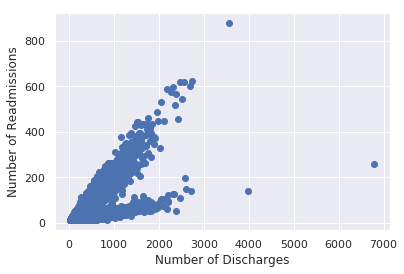

In [50]:
plt.scatter(clean_hospital_read_df['Number of Discharges'],clean_hospital_read_df['Number of Readmissions'])
plt.xlabel('Number of Discharges')
plt.ylabel('Number of Readmissions')
plt.show()

The data shows two different trends with a large difference between them. What is it causing this? Do XRR>1 hospitals are significantly different than those with XRR<1?

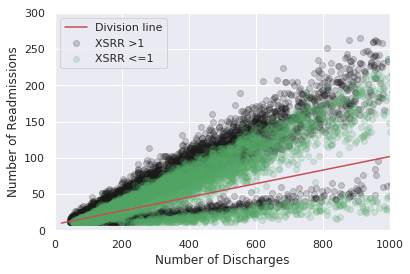

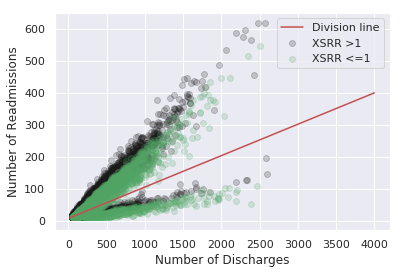

In [79]:
clean_hospital_read_df=clean_hospital_read_df[81:-3]
clean_hospital_read_df['XSgr1']=clean_hospital_read_df['Excess Readmission Ratio']>1
plt.scatter(clean_hospital_read_df[clean_hospital_read_df['XSgr1']]['Number of Discharges'],clean_hospital_read_df[clean_hospital_read_df['XSgr1']]['Number of Readmissions'], color='k', alpha=0.2)
plt.scatter(clean_hospital_read_df[clean_hospital_read_df['XSgr1']==False]['Number of Discharges'],clean_hospital_read_df[clean_hospital_read_df['XSgr1']==False]['Number of Readmissions'], color='g',alpha=0.2)
plt.plot([20,9000],[10,850],color='r')
plt.xlabel('Number of Discharges')
plt.ylabel('Number of Readmissions')
plt.xlim([0,1000])
plt.ylim([0,300])
plt.legend(['Division line','XSRR >1', 'XSRR <=1'])
plt.show()

plt.scatter(clean_hospital_read_df[clean_hospital_read_df['XSgr1']]['Number of Discharges'],clean_hospital_read_df[clean_hospital_read_df['XSgr1']]['Number of Readmissions'], color='k', alpha=0.2)
plt.scatter(clean_hospital_read_df[clean_hospital_read_df['XSgr1']==False]['Number of Discharges'],clean_hospital_read_df[clean_hospital_read_df['XSgr1']==False]['Number of Readmissions'], color='g',alpha=0.2)
plt.plot([20,4000],[10,400],color='r')
plt.xlabel('Number of Discharges')
plt.ylabel('Number of Readmissions')
plt.legend(['Division line','XSRR >1', 'XSRR <=1'])
plt.show()

XRR does not define the separation between the data. Perhaps it's the state on which the hospital is? Let's consider the States with higher and lower incomes. Are poor states more likely to have higer readmissions?

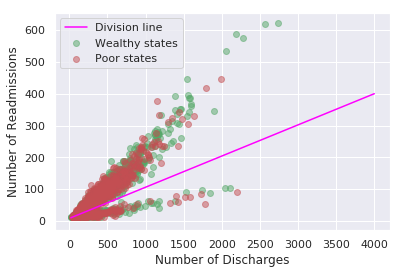

In [58]:
#probably I should group the states by GDP? Poor states = more readmissions?

poor = ['MS', 'AR', 'WV', 'AL', 'KY']
rich = ['DC', 'MD', 'NJ', 'CT', 'MA']

#cool, now repeat the plot above by filtering those states...

plt.scatter(clean_hospital_read_df[clean_hospital_read_df['State'].isin(rich)]['Number of Discharges'],clean_hospital_read_df[clean_hospital_read_df['State'].isin(rich)]['Number of Readmissions'], color='g',alpha=0.5)
plt.scatter(clean_hospital_read_df[clean_hospital_read_df['State'].isin(poor)]['Number of Discharges'],clean_hospital_read_df[clean_hospital_read_df['State'].isin(poor)]['Number of Readmissions'], color='r', alpha=0.5)
plt.plot([20,4000],[10,400],color='magenta')
plt.xlabel('Number of Discharges')
plt.ylabel('Number of Readmissions')
plt.legend(['Division line','Wealthy states', 'Poor states'])
plt.show()

The classification of the ratios depend on different measures. Perhaps the measures are not uniform. How many masure are there?

In [81]:
print(clean_hospital_read_df['Measure Name'].unique())

['READM-30-AMI-HRRP' 'READM-30-HF-HRRP' 'READM-30-PN-HRRP'
 'READM-30-COPD-HRRP' 'READM-30-HIP-KNEE-HRRP']


There are FIVE different measures...

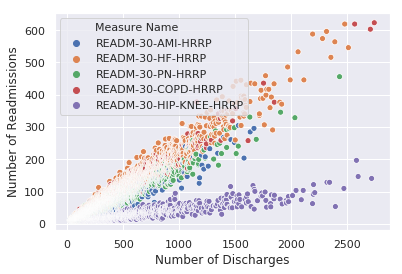

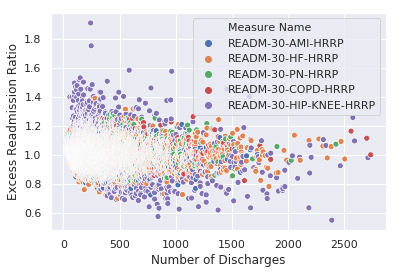

In [53]:
sns.scatterplot(x='Number of Discharges', y='Number of Readmissions', data=clean_hospital_read_df, hue='Measure Name')
plt.show()

sns.scatterplot(x='Number of Discharges', y='Excess Readmission Ratio', data=clean_hospital_read_df, hue='Measure Name')
plt.show()


It is the hip/knee replacements that bias the data. Does this affect the Excess Readmissions as well? We can calculate the readmissions for each measure, and calculate a new p-value for all but the hip/knee replacements:

In [82]:
measures = clean_hospital_read_df['Measure Name'].unique()
print('Pearson r for each measure:')

for meas in measures:
    xs = clean_hospital_read_df[clean_hospital_read_df['Measure Name']==meas]['Number of Discharges'].values
    ys = clean_hospital_read_df[clean_hospital_read_df['Measure Name']==meas]['Excess Readmission Ratio'].values
    r_obs = scipy.stats.pearsonr(xs,ys)[0]
    print(meas, r_obs)

xs = clean_hospital_read_df[clean_hospital_read_df['Measure Name']!=measures[4]]['Number of Discharges'].values
ys = clean_hospital_read_df[clean_hospital_read_df['Measure Name']!=measures[4]]['Excess Readmission Ratio'].values
r_obs = scipy.stats.pearsonr(xs,ys)[0]
print('\n \nPearson r for all but the last measure:', r_obs)

# new p-value (not quite because it includes biased data)
p = np.sum(perm_replicates<r_obs)/len(perm_replicates)
print('\nNew p-val (of non-knee operations) =', p)

Pearson r for each measure:
READM-30-AMI-HRRP -0.12885622454840284
READM-30-HF-HRRP -0.032422287584571885
READM-30-PN-HRRP 0.02834561652982177
READM-30-COPD-HRRP 0.10856375537047996
READM-30-HIP-KNEE-HRRP -0.36389994571020634

 
Pearson r for all but the last measure: -0.0033521910365275653

New p-val (of non-knee operations) = 0.36556


The new p-value reported is clearly biased because we have used the  hip/knee replacement surgery data as if it was not different. Even then, the readmission rate in all other cases does not depend on the number of discharges, which meast that the null hypothesis remains true for $\alpha$ = 0.01.

Let's try to gain some additional insight. IS there any other parameter affecting the trend of the hip replacement readmissions?


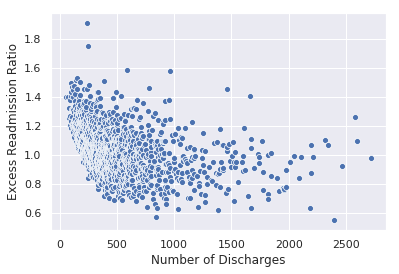

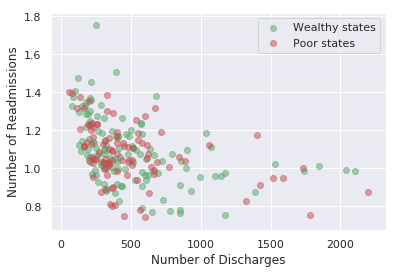

In [55]:
kneehip = clean_hospital_read_df[clean_hospital_read_df['Measure Name']==measures[4]]
#kneehip.head()

sns.scatterplot(x='Number of Discharges', y='Excess Readmission Ratio', data=kneehip)
plt.show()

plt.scatter(kneehip[kneehip['State'].isin(rich)]['Number of Discharges'],kneehip[kneehip['State'].isin(rich)]['Excess Readmission Ratio'], color='g',alpha=0.5)
plt.scatter(kneehip[kneehip['State'].isin(poor)]['Number of Discharges'],kneehip[kneehip['State'].isin(poor)]['Excess Readmission Ratio'], color='r', alpha=0.5)
plt.xlabel('Number of Discharges')
plt.ylabel('Number of Readmissions')
plt.legend(['Wealthy states', 'Poor states'])
plt.show()


The knee/hip readmission rate is not dependent on the economic wealth of the state, so it is the number of discharges that uniquely rules its behaviour, at least with the data we have. We would need additional data gain more insight.

### Figure replotted

This describes much better the data, and the trends


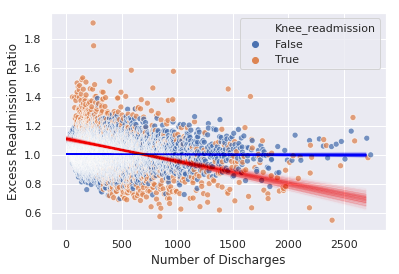

In [78]:
knee_others=clean_hospital_read_df.copy()
knee_others['Knee_readmission']=knee_others['Measure Name']==measures[4]

# perform all the fits!
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""
    inds = np.arange(len(x))
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y,1)

    return bs_slope_reps, bs_intercept_reps

nfits = 500

kneeslopes, kneeintercepts = draw_bs_pairs_linreg(knee_others[knee_others['Knee_readmission']==True]['Number of Discharges'].values, knee_others[knee_others['Knee_readmission']==True]['Excess Readmission Ratio'].values, size=1000)
restslopes, restintercepts = draw_bs_pairs_linreg(knee_others[knee_others['Knee_readmission']==False]['Number of Discharges'].values, knee_others[knee_others['Knee_readmission']==False]['Excess Readmission Ratio'].values, size=1000)



sns.scatterplot(x='Number of Discharges', y='Excess Readmission Ratio', data=knee_others, hue='Knee_readmission', alpha=0.75)
x = np.array([1, 2700])
for i in range(nfits):
    plt.plot(x, restslopes[i] * x + restintercepts[i], linewidth=0.5, alpha=0.025, color='blue')
    plt.plot(x, kneeslopes[i] * x + kneeintercepts[i], linewidth=0.5, alpha=0.025, color='red')
plt.show()

### Conclusions

The Excess Readmission Ration only depends on the number of discharges for knee/hip replacement surgeries. For the rest of operations considered in the dataset, there is no correlation between the number of discharges and excess readmission ratio.

There are two recommendations to account for:

 + Analyze the capability of smaller centers to perform these operations, or find a reason for the origin of the large number of readmissions
 
 + If it is observed that small hospitals are perfoming at its optimum, a re-definition of the ratio should be considered to account for such deviation